In [95]:
%matplotlib inline

from datacube import Datacube
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm

import cv2
import time

# imports for database retrieval and image conversion
#from firebase import firebase
import json
from PIL import Image

# uses base64 encoder to convert the image
import base64
import asyncio

In [96]:
dc = Datacube()

In [97]:
lat = (65.590962, 65.638668)
lon = (22.043322, 22.175764)

query = {
    "product": "sentinel_s2_l2a_zips",
    "output_crs": "epsg:3006",
    "lat": lat,
    "lon": lon,
    "resolution": (10, -10),
    "time": ["2019-07-01", "2019-08-01"],
    "measurements": [
        "B02_10m",
        "B03_10m",
        "B04_10m",
        "B08_10m",
        "SCL_20m", 
        "CLDPRB_20m"
    ]
}

In [98]:
def progress(processed, total):
        print(f'\rProcessing {processed} of {total}...', end='', flush=True)


In [99]:
#setting up data retreival from space data cloud real time (once everyday)
#commented because we can't set this up right now
'''
firebase = firebase.FirebaseApplication('satellite data from server', None)

while True:
    # retrieve data from firebase
    s = firebase.get('datellite data server')

    ds = dc.load(progress_cbk = progress, **query)
      

    # cv2.imshow("Image",frame)
 
    time.slep(86400)#wait 1day to get the next image for lat and lon (much effiecient ways to do that, just for POC)
    if key == 27: #esc key stops the process
        break
       
cv2.destroyAllWindows()
'''

'\nfirebase = firebase.FirebaseApplication(\'satellite data from server\', None)\n\nwhile True:\n    # retrieve data from firebase\n    s = firebase.get(\'datellite data server\')\n\n    ds = dc.load(progress_cbk = progress, **query)\n      \n\n    # cv2.imshow("Image",frame)\n \n    time.slep(86400)#wait 1day to get the next image for lat and lon (much effiecient ways to do that, just for POC)\n    if key == 27: #esc key stops the process\n        break\n       \ncv2.destroyAllWindows()\n'

In [100]:
ds = dc.load(progress_cbk = progress, **query)

Processing 114 of 114...

In [101]:
cmap = ListedColormap(
    (
        (0.3, 0, 0.3),
        (1, 0.92, 0),
        
    )
)
norm = BoundaryNorm(range(0, 3), cmap.N)

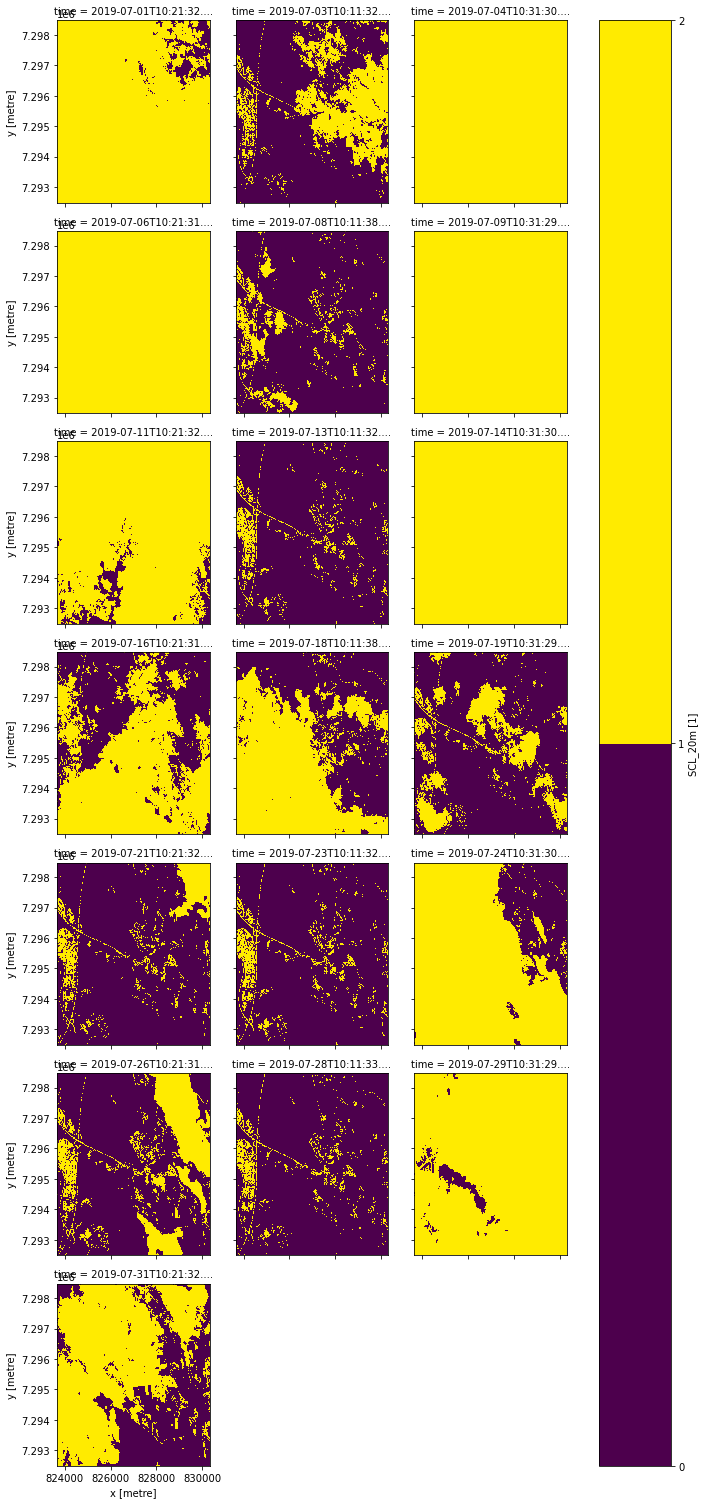

In [102]:
W_clouds = ds.SCL_20m.where(((ds.SCL_20m>=7) & (ds.SCL_20m<=10)),0)
W_clouds=W_clouds.where(W_clouds==0,1)

W_clouds.plot(col="time", col_wrap=3, cmap=cmap, norm=norm)

In [103]:
cld_pix_perc = (W_clouds.isin([1]).sum(dim=['x', 'y']) / W_clouds.count(dim = ['x', 'y']) * 100)
print(cld_pix_perc)

<xarray.DataArray 'SCL_20m' (time: 19)>
array([ 95.00764748,  27.7590895 , 100.        , 100.        ,
        10.34658563, 100.        ,  93.01705437,   7.27784831,
       100.        ,  59.84874991,  55.50193436,  19.4675757 ,
        12.46538642,   8.09807763,  78.40987474,  25.94318875,
         7.23836134,  96.55238771,  62.17948077])
Coordinates:
  * time         (time) datetime64[ns] 2019-07-01T10:21:32.394451 ... 2019-07...
    spatial_ref  int32 3006


In [108]:
#API to decide alert (if high cloud density for maxCloudyDays number of days, send an alert about possible road damage)
cloudDensityUpperThreshold = 90
cloudDensityLowerThreshold = 50
maxCloudyDays = 2
def sendAlert(data):
    alert =False
    cloudyDays = 0
    print (data[0])
    for i in data:
        print (i)
        if (i > cloudDensityUpperThreshold):
            cloudyDays +=1
            if (cloudyDays==maxCloudyDays):
                return True
        elif (i<cloudDensityLowerThreshold):
            cloudyDays = 0
    return False

alertVal = sendAlert(cld_pix_perc)
print (alertVal)
if(alertVal):
    #send alert about possible road damage
    None
    

<xarray.DataArray 'SCL_20m' ()>
array(95.00764748)
Coordinates:
    time         datetime64[ns] 2019-07-01T10:21:32.394451
    spatial_ref  int32 3006
<xarray.DataArray 'SCL_20m' ()>
array(95.00764748)
Coordinates:
    time         datetime64[ns] 2019-07-01T10:21:32.394451
    spatial_ref  int32 3006
<xarray.DataArray 'SCL_20m' ()>
array(27.7590895)
Coordinates:
    time         datetime64[ns] 2019-07-03T10:11:32.732516
    spatial_ref  int32 3006
<xarray.DataArray 'SCL_20m' ()>
array(100.)
Coordinates:
    time         datetime64[ns] 2019-07-04T10:31:30.776214
    spatial_ref  int32 3006
<xarray.DataArray 'SCL_20m' ()>
array(100.)
Coordinates:
    time         datetime64[ns] 2019-07-06T10:21:31.586644
    spatial_ref  int32 3006
True
